<h1> HABERMAN DATASET </h1>

* <b>Age</b> : Age of patient at the time of operation 
* <b>Year</b> : Patient’s year of operation 
* <b>Nodes</b> : Number of positive axillary nodes detected 
*<b>Survival status</b> (class attribute) :
    1 = the patient survived 5 years or longer
    2 = the patient died within 5 years
* <b>Variables</b> : age,year and nodes
* <b>Class label</b> : status
* <b>Independent variables</b> : age,year,nodes
* <b>Dependent variable</b> : status



In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 



In [23]:
haberman = pd.read_csv('haberman.csv')
print(haberman)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [24]:
#No. of datapoints and features
print(haberman.shape)

(306, 4)


In [25]:
# Column names
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [12]:
print(haberman['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


<h3>Observation</h3> : This is unbalanced dataset as status 1 and status 2 have different values.

Text(0.5, 1.0, '2-D Scatter Plot : age v/s year')

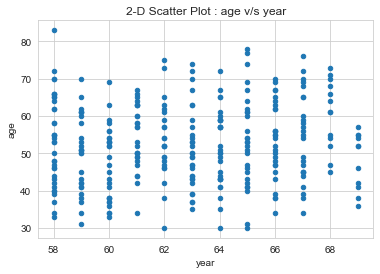

In [26]:
# 2-D scatter point 
haberman.plot(kind="scatter",x="year",y="age")
plt.title("2-D Scatter Plot : age v/s year")

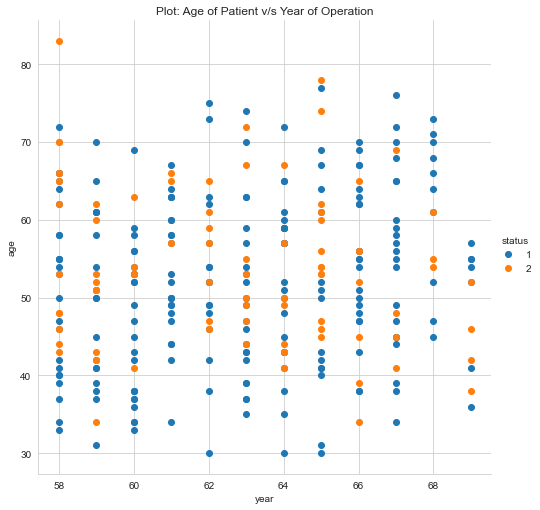

In [27]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=7).map(plt.scatter, "year", "age").add_legend();

plt.title("Plot: Age of Patient v/s Year of Operation")
plt.show();

<h3>Observations:</h3>
<ul>
    <li>Status 1 = the patient survived 5 years or longer </li>
    <li>Status 2 = the patient died within 5 years</li>
</ul>
<ol>
<li> Patients whose age is less than 40 years have more chance of survival longer than 5 years irrespective of year of operation.</li>
<li> In 1959 and 1967,operation is highly succeed,as in this year there is only fewer case in which the patient died within 5 years.</li>
  </ol>


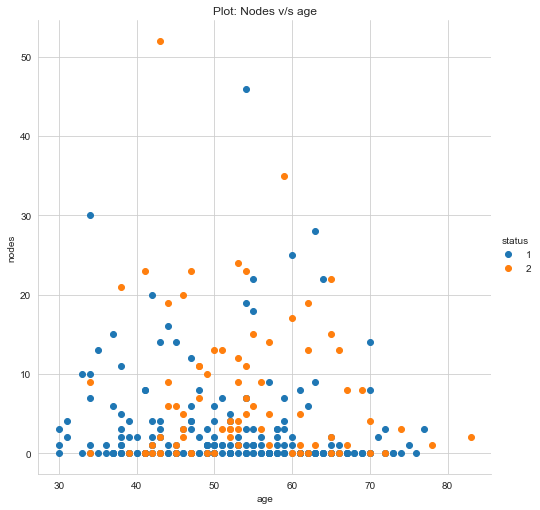

In [30]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="status",size=7).map(plt.scatter,"age","nodes").add_legend()
plt.title("Plot: Nodes v/s age")
plt.show()

<h3>Observation:</h3>
<ol>
<li> Patients whose age is between 30 and 40 have more chance of survival irrespective of positive axillary nodes detected</li>
<li> As the no. of auxiliary nodes increases the chance of survival decreased with the increase in Patient age. </li>
    </ol>

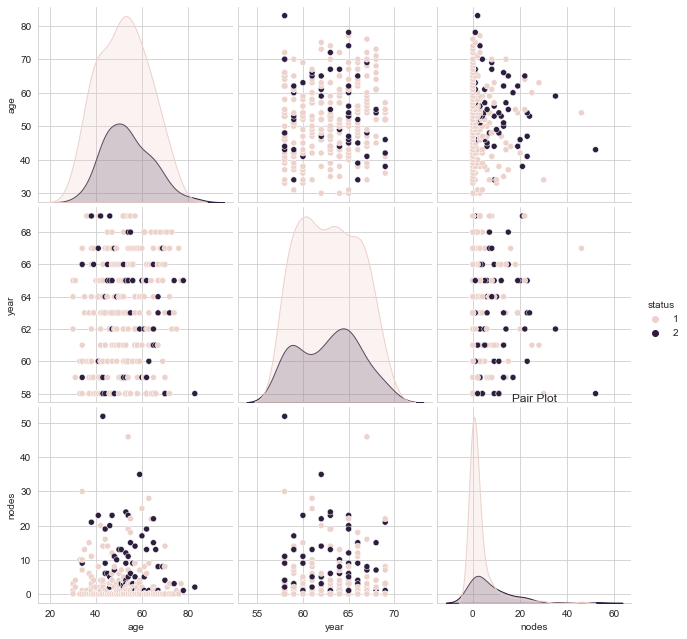

In [32]:
#Pairplot
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",size = 3)
plt.title("Pair Plot")
plt.show()

<h3>Observations : </h3>
    <ul>
    <li>In plot 3 and plot 7 ,status 1 and status 2 are more seperable where age and nodes are on x-axis.</li></ul>
    
    if(nodes<5):
         The patient will survive 5 years or longer 
    else : 
         The patient will die within 5 years
                 
       
    

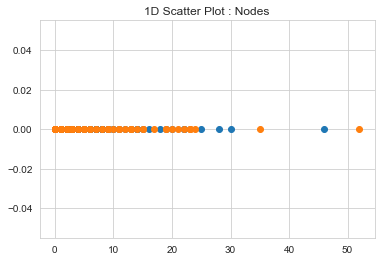

In [51]:
import numpy as np
haberman_status1 = haberman[haberman['status'] == 1];
haberman_status2 = haberman[haberman['status'] == 2];
plt.plot(haberman_status1['nodes'],np.zeros_like(haberman_status1['nodes']),'o')
plt.plot(haberman_status2['nodes'],np.zeros_like(haberman_status2['nodes']),'o')
plt.title("1D Scatter Plot : Nodes")

plt.show()



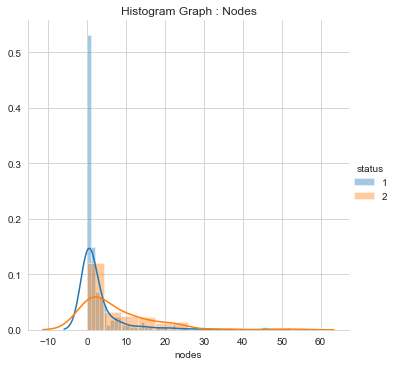

In [38]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram Graph : Nodes")
plt.show();



<h3>Observations :</h3>
    <ul>
    <li>status1 and status 2 plots are overlapping </li>
   <li> We can say that Patients who have positive axillary nodes less than 3 : <i>Have chance of survival longer than 5 years</i></li>
    <li>Patients who have no. of nodes > 3 : <i>will die within 5 years from the year of operation.</i></li>
</ul>
      

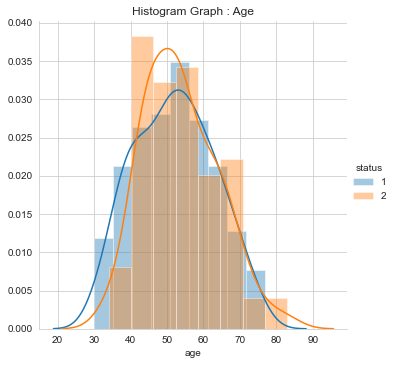

In [37]:

sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram Graph : Age")
plt.show();

<h3>Observation : </h3>
    <ul>
    <li>Patients whose age is less than 40 : Have chance of survival longer than 5 years</li>
    <li>Patients whose age is older than 40 years : Die within 5 years</li>
        </ul>

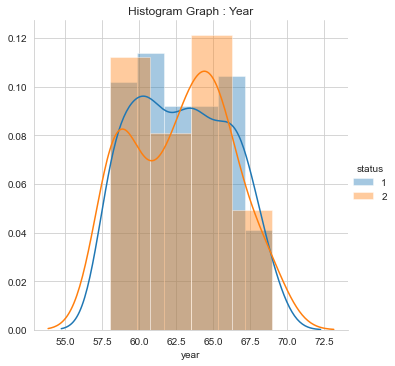

In [39]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram Graph : Year")
plt.show();

<h3>Observation :</h3>
    <ul><li>In this case of year of operation the plot of status 1 and status 2 is highly overlapped that we could not
                use if-else condition in this case. </li></ul>
    

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]


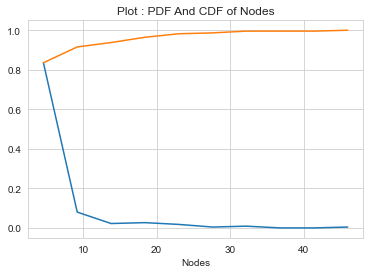

In [41]:
counts, bin_edges = np.histogram(haberman_status1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Nodes")
plt.title("Plot : PDF And CDF of Nodes")
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


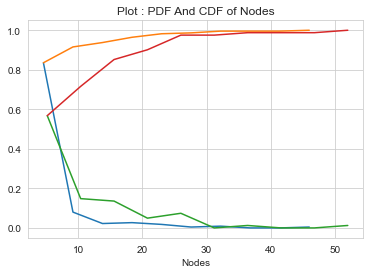

In [42]:
counts, bin_edges = np.histogram(haberman_status1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




counts, bin_edges = np.histogram(haberman_status2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Nodes")
plt.title("Plot : PDF And CDF of Nodes")

plt.show();

<h3>Observation :</h3>
    <ul>
<li>Orange Line : Status 1</li>
<li>Red Line : Status 2</li>
    <li>As we can see that when the no. of positive axillary nodes are less than 10 there is 
                greater chance of survival of patient longer than 5 years (almost 82%) and chances of
        patient die within 5 years of operation is around 58%</li>
             <li>When the no. of axillary nodes are less than 25 still chances of survival of patient
                 longer than 5 years are more that of patient die within 5 years</li>
             <li>But as we proceed further when the no. of auxillary nodes are greater than 25 we can't
                 comment on the survival status as the percentage of both are same</li>
    </ul>
    

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


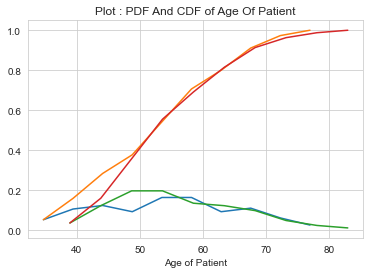

In [43]:
counts, bin_edges = np.histogram(haberman_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_status2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Age of Patient")
plt.title("Plot : PDF And CDF of Age Of Patient")

plt.show();

<h3>Observations :</h3>
    <ul>
    <li>Orange Line : Status 1</li>
    <li>Red Line : Status 2 </li></ul>
    
    if age of patient < 48 :
        patient will survive longer than 5 years
    else :
        Equal chances of survival of patient longer than 5 years or die within 5 years
        

In [11]:
#Mean
import numpy as np
print(np.mean(haberman_status1['nodes']))
print(np.mean(haberman_status2['nodes']))

2.7911111111111113
7.45679012345679


In [12]:
#standard-deviation
import numpy as np
print(np.std(haberman_status1['nodes']))
print(np.std(haberman_status2['nodes']))

5.857258449412131
9.128776076761632


<h3>Observations:</h3>
    <ul>
    <li>As mean tells us about the central tendency .Here the mean of status1(nodes) is 2.7911111111111113
    and status2(nodes) is 7.45679012345679.</li>
    <li>Spread of status2 : -2(7-9) to 16(7+9)</li> </ul>
    <p>
     <b> if no. of axillary nodes detected < 3: </b>
        Patient will survive longer than 5 years<br>
         <b>if no. of axillary nodes detected > 7:</b>
        Patient will die within 5 years
        
    
        

In [41]:
import numpy as np
print(np.median(haberman_status1['nodes']))

print(np.median(haberman_status2['nodes']))

0.0
4.0


In [42]:
print(np.percentile(haberman_status1['nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_status2['nodes'],np.arange(0,100,25)))
from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(haberman_status1['nodes']))
print(robust.mad(haberman_status2['nodes']))

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation
0.0
5.930408874022408


<h3>Observations:</h3>
    <ul>
    <li>Mean value is largely differ from Median .It may be due to the presence of outliers.</li>
    </ul>
    

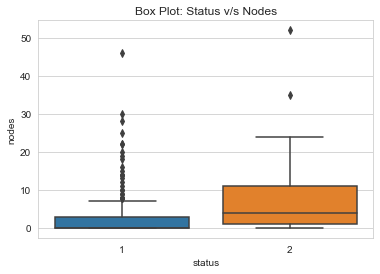

In [47]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box Plot: Status v/s Nodes")
plt.show()

<h3>Observation : </h3>
<ul>
    <li><b>if no. of nodes < 5:</b>
                            status 1 : chances of survival longer than 5 years (75% error)</li>
    <li><b>if no. of nodes > 5 :</b>
        status 2 : Patient die within 5 years (0% error)</li>
 </ul>           

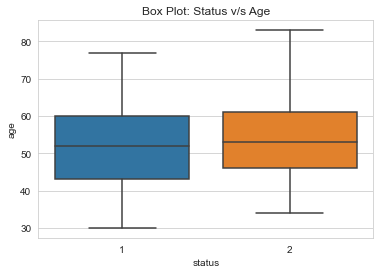

In [48]:
sns.boxplot(x='status',y='age', data=haberman)
plt.title("Box Plot: Status v/s Age")
plt.show()

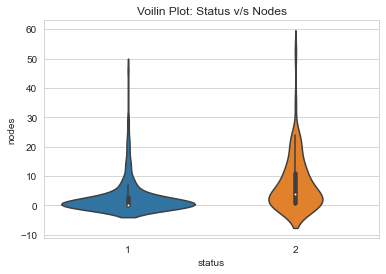

In [49]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("Voilin Plot: Status v/s Nodes")
plt.show()

<h3>Observation :</h3>
    <ul><li>It seems that both status 1 and status 2 are postively skewed</li></ul>

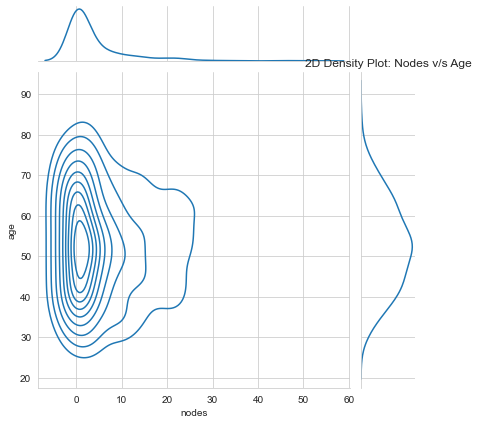

In [50]:
#2D Density plot, contors-plot
sns.jointplot(x="nodes", y="age", data=haberman, kind="kde");
plt.title("2D Density Plot: Nodes v/s Age")
plt.show();

<h3>Observation :</h3>
    <ul><li>Mostly in the patients whose age is between 45 to 58 ,the no. of nodes detected are b/w  0 and  3 .</li></ul>

<h3> Conclusion </h3>


<ul><li> The chances of survival of patient depends on 2 factors.</li></ul>
<ol><li> Age of Patient</li>
<li> No. of positive auxillary nodes detect in the patient</li>
</ol>
<ul><li><b>Age :</b> When the patient age is less than 40 years, the chance of survival of patient longer than 5 years is more.</li>
    <li><b> Nodes :</b> When the no. of nodes detected in patient is less than 3 there is around 82% chances that patient will survive longer than 5 years</li>
    <li> Mostly the no. of nodes detected in patients whose age is less than 40 years is less as compare to older patients.</li>
    